<left>FINM 36702 - Portfolio Credit Risk: Modeling and Estimation</left>
<left>Spring 2023</left>
<br>
<h1><center> Assignment 3 </center></h1>
<center>Due - 18:00 [CST] April 13th, 2023</center>
<br>
<h3>Ki Hyun</h3>
<h3>Student ID: 12125881</h3>

### Imports

In [1]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1.

In [3]:
def dr_pdf(x):
    return 2 - 2*x

In [4]:
def lgd_pdf(x):
    return 4*x - 4*x**3

In [6]:
grid = np.arange(start = 0, stop = 1, step = 0.001)
drs = np.vectorize(dr_pdf)(grid)
lgds = np.vectorize(lgd_pdf)(grid)

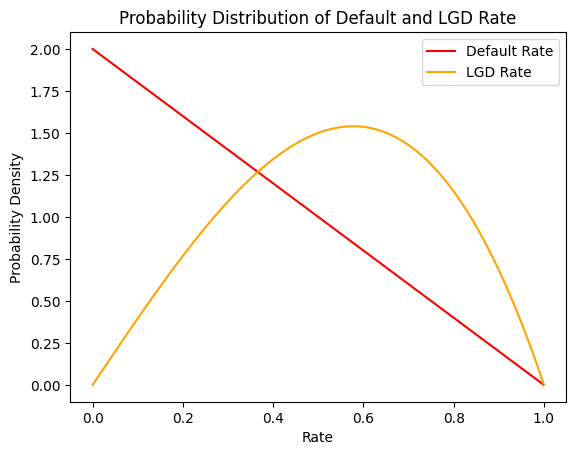

In [10]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data for default rate
ax.plot(grid, drs, color='red', label='Default Rate')

# Plot the data for LGD rate
ax.plot(grid, lgds, color='orange', label='LGD Rate')

# Add labels and title
ax.set_ylabel('Probability Density')
ax.set_xlabel('Rate')
ax.set_title('Probability Distribution of Default and LGD Rate')
ax.legend()

# Show the plot
plt.show()

# Question 2.

In [19]:
def loss_pdf(x):
    if x == 0.0:
        return np.inf
    else:
        return 4/3 * x**(-1/3) - 4/3 * x**(1/3)

In [20]:
losses = np.vectorize(loss_pdf)(grid)

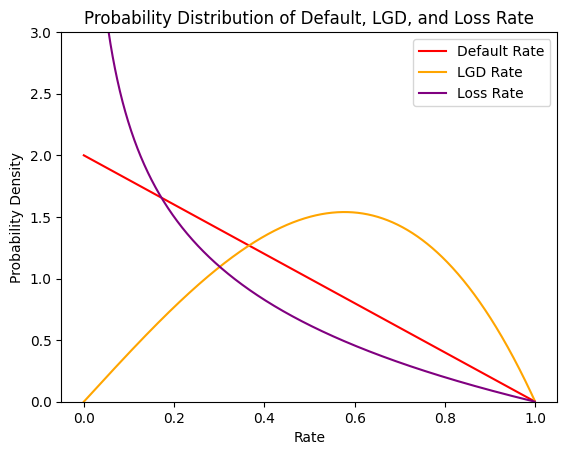

In [21]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data for default rate
ax.plot(grid, drs, color='red', label='Default Rate')

# Plot the data for LGD rate
ax.plot(grid, lgds, color='orange', label='LGD Rate')

# Plot the data for LGD rate
ax.plot(grid, losses, color='purple', label='Loss Rate')

# Add labels and title
ax.set_ylabel('Probability Density')
ax.set_xlabel('Rate')
ax.set_title('Probability Distribution of Default, LGD, and Loss Rate')
ax.legend()

# Set the limits of the vertical axis to range from 0 to 3
ax.set_ylim(0, 3)

# Show the plot
plt.show()

# Question 3.